This summer, I was tired of my outdated prepaid phone plan and decided it was time for a change.  
I was using the MagentaMobil Prepaid M from Deutsche Telekom AG, which only offered a meager 2GB of data transfer. I wanted to stay within the T-Mobile network (D1) for the best coverage, but also keep my monthly costs under 10€. After some research, I discovered fraenk, a subsidiary of Deutsche Telekom AG, which offered a 5GB plan for the same cost as my previous 2GB plan. Plus, when signing up using a discount code, I was able to get an additional 2GB of data volume. So, in total, I ended up with around 7GB of data volume right out of the gate.

#### Fraenk for friends

At the same time as I was signing up for the 5GB plan, I learned about fraenk's referral program. Through this program, I could earn an extra 2GB of data volume for every friend that signed up using my referral code. If I was able to successfully refer five friends, this would bring my additional data volume up to an impressive 10GB. Combined with the 7GB I already had, this would add up to 17GB of data per month - more than enough for my needs.

I soon realized that referring friends could be a bit tedious, so I looked for alternative ways to acquire referrals. I noticed that some people were sharing their codes on the subreddit r/fraenkforfriends, while others were posting in the mydealz forum to try and get people to sign up. However, I soon discovered that posting referral codes as vouchers on mydealz was not allowed.

But, I found a loophole. Mydealz has some sort of voucher code sync-agreement with the website gutscheinsammler.de. So, I decided to shoot an email to the team at gutscheinsammler.de, explaining that I found this magical referral code. A day or two later my code actually appeared on the mydealz voucher site, completely bypassing moderation.

These days, a lot more people have seemed to figure this out, since my code is perished between around 20 other codes from people who have used the same trick.

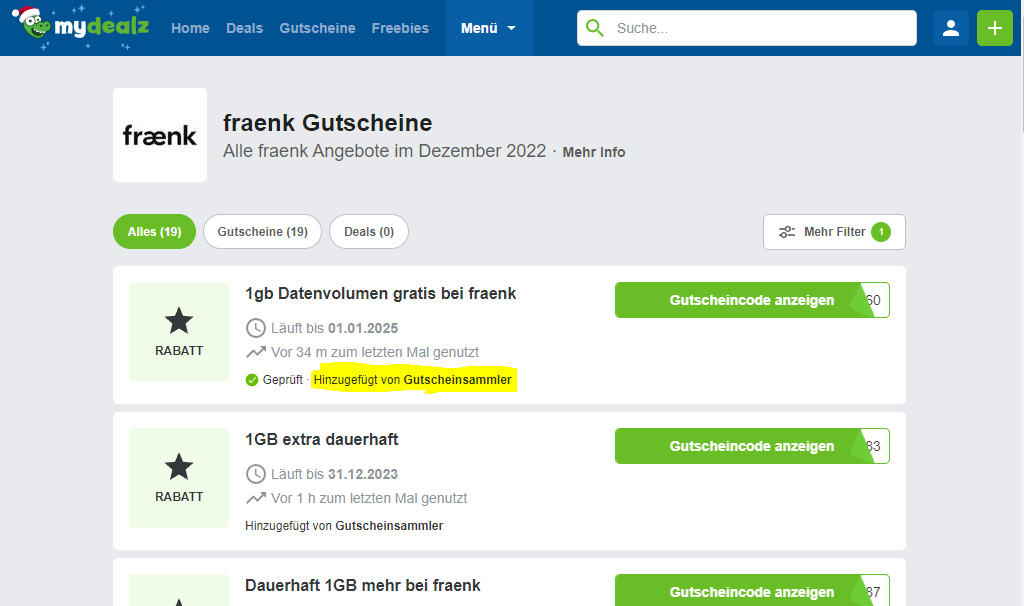

During this time I "referred" 136 new customers to fraenk, which easilly earned me my 17GB. More interestingly though, fraenk sends out an email every time somebody signs up using a referral link. So after a while my inbox was flooded with emails telling me I had successfully referred someone.

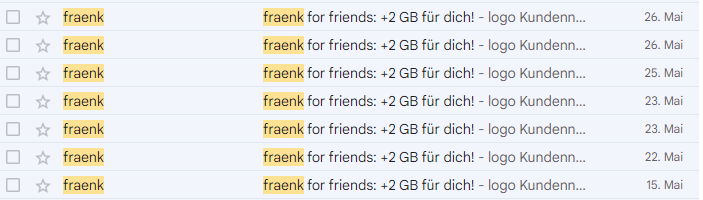

The referral codes had a timestamp attached to them, which made me think it would be interesting to see when people were actually signing up for their phone plans..

#### Inside information?

In [155]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [156]:
import locale
locale.setlocale(locale.LC_TIME, "de_DE");

In [157]:
f = open("fraenk_timestamps.csv", "r+")
lines = f.readlines()

In [52]:
test = lines[1]

In [159]:
MONTH_MAP = {"Mai": 5, "Juni": 6, "Juli": 7, "Aug": 8, "Sept": 9, "Okt": 10, "Dez": 12}

In [160]:
def parse_timestamp(string):
    day = string.split(" ")[1][:-1]
    
    month = string.split(" ")[2]
    if "." in month:
        month = month[:-2]
    else:
        month = month[:-1]
    time = string.split(" ")[3][:-1]
    
    return f"{day}. {MONTH_MAP[month]}. 2022 {time}"

In [162]:
parsed_timestamps = [parse_timestamp(x) for x in lines]
parsed_timestamps = [datetime.strptime(x, '%d. %m. %Y %H:%M') for x in parsed_timestamps]

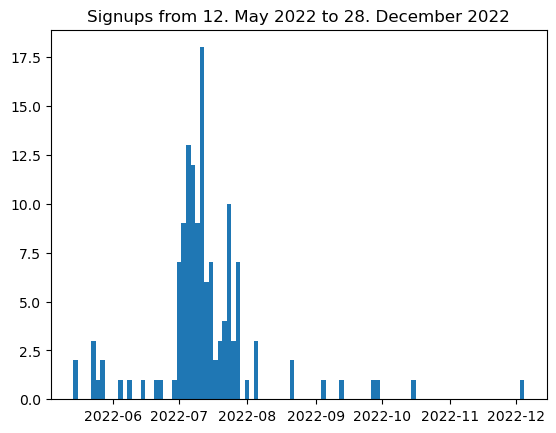

In [167]:
plt.hist(parsed_timestamps, bins=100)
plt.title("Signups from 12. May 2022 to 28. December 2022");

Nothing too unexpected here, however there is a very apparent spike in signups beginning in July of 2022. The signups dry up evenly abruptly on the 28th of July. Could this be indicative of some sort of 4-week marketing campaign?

In [168]:
july_timestamps = [x for x in parsed_timestamps if x.month == 7]

Text(0.5, 1.0, 'Fraenk referral signups, July 2022')

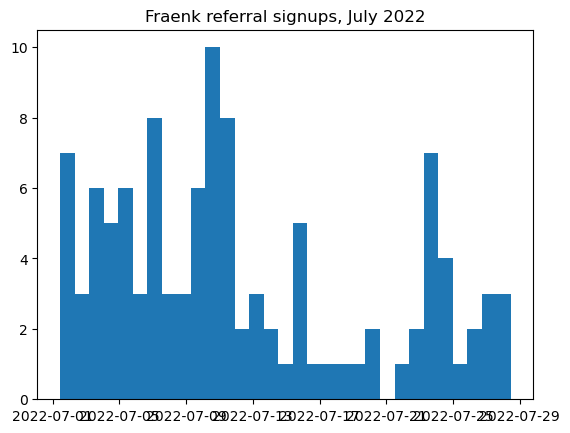

In [181]:
plt.hist(july_timestamps, bins=31)
plt.title("Fraenk referral signups, July 2022")

#### Sunday funday

I was thinking about how I would allocate my marketing budget in trying to attract new customers. A good way of starting would likely be to take a look at when people prefer to sign up. According to my (admittedly rather small) sample, people heavilly prefer to sign up during the weekend. Oddly enough, signups on monday are also pretty high.  
During the weekdays signups are lower, which I attribute to people being busy working..  
Obviously there could be many more factors at play but as an outside observer, I think this is a good place to start :)

In [105]:
weekdays = [x.weekday() for x in parsed_timestamps]

In [113]:
import smartplotlib.pyplot as sm

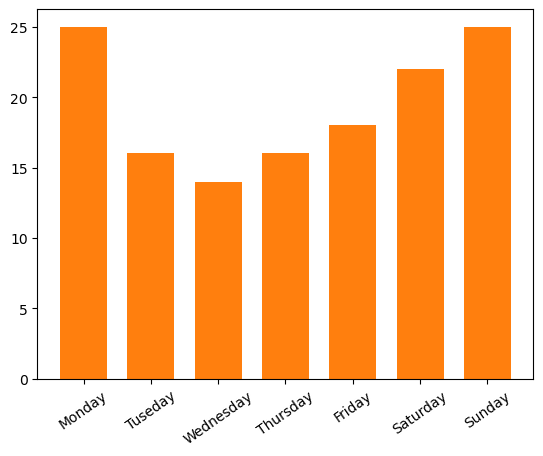

In [151]:
p = sm.bar({x: weekdays.count(x) for x in range(0,7)}, inverted=True)
p._ax.set_xticks([0,1,2,3,4,5,6],
                 ["Monday", "Tuseday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
p.xrotation = 35

Other things like looking at the time of the day where people preferably sign up would also be possible. If you want to have a shot at it yourself, download the timetamps from here:  
<a download="fraenk_timestamps.csv" href="data:@file/csv;base64,U28uLCA0LiBEZXouLCAxNjozMg0KU2EuLCAxNS4gT2t0LiwgMTU6MDgNCkRvLiwgMjkuIFNlcHQuLCAxNjo0Mw0KRGkuLCAyNy4gU2VwdC4sIDA4OjA3DQpEaS4sIDEzLiBTZXB0LiwgMTE6MTMNClNhLiwgMy4gU2VwdC4sIDE5OjE2DQpTby4sIDIxLiBBdWcuLCAyMjoxMw0KU28uLCAyMS4gQXVnLiwgMTg6MjANCkZyLiwgNS4gQXVnLiwgMTk6NTUNCkZyLiwgNS4gQXVnLiwgMTI6MTINCkRvLiwgNC4gQXVnLiwgMTg6MjcNCk1vLiwgMS4gQXVnLiwgMTE6MjANCkRvLiwgMjguIEp1bGksIDExOjA4DQpEby4sIDI4LiBKdWxpLCAwNzowNw0KTWkuLCAyNy4gSnVsaSwgMTk6MTINCkRpLiwgMjYuIEp1bGksIDIxOjU4DQpEaS4sIDI2LiBKdWxpLCAyMToyMA0KRGkuLCAyNi4gSnVsaSwgMjE6MTgNCkRpLiwgMjYuIEp1bGksIDE1OjUyDQpNby4sIDI1LiBKdWxpLCAyMzo1Mg0KTW8uLCAyNS4gSnVsaSwgMTQ6MjYNClNvLiwgMjQuIEp1bGksIDE1OjIxDQpTby4sIDI0LiBKdWxpLCAxMToyMQ0KU28uLCAyNC4gSnVsaSwgMTA6NTQNClNvLiwgMjQuIEp1bGksIDA2OjI2DQpTYS4sIDIzLiBKdWxpLCAyMzozMA0KU2EuLCAyMy4gSnVsaSwgMTk6NTYNClNhLiwgMjMuIEp1bGksIDE2OjEwDQpTYS4sIDIzLiBKdWxpLCAxNDowMw0KU2EuLCAyMy4gSnVsaSwgMTM6MDgNClNhLiwgMjMuIEp1bGksIDExOjEyDQpTYS4sIDIzLiBKdWxpLCAxMDowNA0KRnIuLCAyMi4gSnVsaSwgMDk6NTkNCkZyLiwgMjIuIEp1bGksIDA5OjIwDQpEby4sIDIxLiBKdWxpLCAxNjo0NQ0KTWkuLCAyMC4gSnVsaSwgMTE6NTINCk1pLiwgMjAuIEp1bGksIDA4OjIyDQpNby4sIDE4LiBKdWxpLCAyMjoxOA0KTW8uLCAxOC4gSnVsaSwgMTE6MjANClNvLiwgMTcuIEp1bGksIDE2OjMwDQpTYS4sIDE2LiBKdWxpLCAxNDo1Mg0KU2EuLCAxNi4gSnVsaSwgMDA6MDkNCkZyLiwgMTUuIEp1bGksIDIyOjU3DQpGci4sIDE1LiBKdWxpLCAyMDoyMw0KRnIuLCAxNS4gSnVsaSwgMTc6MTcNCkZyLiwgMTUuIEp1bGksIDEwOjA2DQpGci4sIDE1LiBKdWxpLCAwMDo0NA0KRG8uLCAxNC4gSnVsaSwgMDk6MDkNCkRvLiwgMTQuIEp1bGksIDA0OjIwDQpNaS4sIDEzLiBKdWxpLCAxMzozMg0KTWkuLCAxMy4gSnVsaSwgMTM6MjMNCk1pLiwgMTMuIEp1bGksIDExOjUzDQpEaS4sIDEyLiBKdWxpLCAxNzo0OA0KRGkuLCAxMi4gSnVsaSwgMDc6MTINCk1vLiwgMTEuIEp1bGksIDE4OjQwDQpNby4sIDExLiBKdWxpLCAxNzo0MQ0KTW8uLCAxMS4gSnVsaSwgMTU6NTMNCk1vLiwgMTEuIEp1bGksIDE0OjAwDQpNby4sIDExLiBKdWxpLCAxMzo1Ng0KTW8uLCAxMS4gSnVsaSwgMTI6MzINCk1vLiwgMTEuIEp1bGksIDA3OjM4DQpNby4sIDExLiBKdWxpLCAwNTo1Mw0KTW8uLCAxMS4gSnVsaSwgMDA6NDMNCk1vLiwgMTEuIEp1bGksIDAwOjExDQpTby4sIDEwLiBKdWxpLCAyMjoyMQ0KU28uLCAxMC4gSnVsaSwgMTc6MjENClNvLiwgMTAuIEp1bGksIDExOjU1DQpTby4sIDEwLiBKdWxpLCAxMToyNA0KU28uLCAxMC4gSnVsaSwgMTE6MjQNClNvLiwgMTAuIEp1bGksIDEwOjA1DQpTby4sIDEwLiBKdWxpLCAwODo1OA0KU28uLCAxMC4gSnVsaSwgMDY6MzQNClNhLiwgOS4gSnVsaSwgMTk6MjgNClNhLiwgOS4gSnVsaSwgMTk6MTgNClNhLiwgOS4gSnVsaSwgMTY6NTMNClNhLiwgOS4gSnVsaSwgMTQ6MjgNClNhLiwgOS4gSnVsaSwgMTE6NTcNClNhLiwgOS4gSnVsaSwgMTA6NDQNClNhLiwgOS4gSnVsaSwgMDE6MzkNCkZyLiwgOC4gSnVsaSwgMjM6MDINCkZyLiwgOC4gSnVsaSwgMTQ6MDgNCkRvLiwgNy4gSnVsaSwgMTg6MzMNCkRvLiwgNy4gSnVsaSwgMTY6MzQNCkRvLiwgNy4gSnVsaSwgMTQ6NTQNCkRvLiwgNy4gSnVsaSwgMTI6MzQNCkRvLiwgNy4gSnVsaSwgMTI6MzMNCkRvLiwgNy4gSnVsaSwgMTI6MzANCkRvLiwgNy4gSnVsaSwgMTA6MjUNCk1pLiwgNi4gSnVsaSwgMjM6NTYNCk1pLiwgNi4gSnVsaSwgMjA6NTMNCk1pLiwgNi4gSnVsaSwgMjA6MTQNCk1pLiwgNi4gSnVsaSwgMTY6MzANCk1pLiwgNi4gSnVsaSwgMDk6MTcNCk1pLiwgNi4gSnVsaSwgMDE6MTgNCkRpLiwgNS4gSnVsaSwgMTk6MzINCkRpLiwgNS4gSnVsaSwgMTg6MzYNCkRpLiwgNS4gSnVsaSwgMTQ6MzgNCkRpLiwgNS4gSnVsaSwgMTE6NDQNCkRpLiwgNS4gSnVsaSwgMDc6MjQNCk1vLiwgNC4gSnVsaSwgMjM6MTUNCk1vLiwgNC4gSnVsaSwgMjI6NDUNCk1vLiwgNC4gSnVsaSwgMjA6NTINCk1vLiwgNC4gSnVsaSwgMTc6MzgNCk1vLiwgNC4gSnVsaSwgMTQ6MjkNCk1vLiwgNC4gSnVsaSwgMTM6MDUNCk1vLiwgNC4gSnVsaSwgMDk6MTYNCk1vLiwgNC4gSnVsaSwgMDA6MjQNClNvLiwgMy4gSnVsaSwgMTU6NDYNClNvLiwgMy4gSnVsaSwgMTQ6MzkNClNvLiwgMy4gSnVsaSwgMDk6NTkNClNvLiwgMy4gSnVsaSwgMDk6NTUNClNvLiwgMy4gSnVsaSwgMDk6MzcNClNhLiwgMi4gSnVsaSwgMTg6MjgNClNhLiwgMi4gSnVsaSwgMTc6MjANClNhLiwgMi4gSnVsaSwgMTA6NTANClNhLiwgMi4gSnVsaSwgMDA6NDUNCkZyLiwgMS4gSnVsaSwgMjI6MTANCkZyLiwgMS4gSnVsaSwgMTg6MDcNCkZyLiwgMS4gSnVsaSwgMTc6MTANCkZyLiwgMS4gSnVsaSwgMTY6MTYNCkZyLiwgMS4gSnVsaSwgMTA6NTgNCkZyLiwgMS4gSnVsaSwgMTA6NDENCkRpLiwgMjguIEp1bmksIDA4OjM3DQpNaS4sIDIyLiBKdW5pLCAyMDozMg0KU28uLCAxOS4gSnVuaSwgMjA6NTENCkRpLiwgMTQuIEp1bmksIDIzOjQ1DQpEaS4sIDcuIEp1bmksIDIyOjU5DQpTby4sIDUuIEp1bmksIDA4OjMwDQpEby4sIDI2LiBNYWksIDE5OjUxDQpEby4sIDI2LiBNYWksIDEzOjQ1DQpNaS4sIDI1LiBNYWksIDA4OjQwDQpNby4sIDIzLiBNYWksIDE5OjQzDQpNby4sIDIzLiBNYWksIDEyOjQ0DQpTby4sIDIyLiBNYWksIDA2OjE5DQpTby4sIDE1LiBNYWksIDE4OjE5DQpGci4sIDEzLiBNYWksIDIxOjUxDQo=">fraenk_timestamps.csv</a>